# Project: Correlation between GdP and democracy with expend in military and health, suicide level and sugar consuption between 1995 to 2010 with focus on outler countries


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> My investigation will analyse the evolution expend in military and health, suicide level and sugar consuption from 1995 to 2010 in relation with the GdP increase and the democracy score evolution. 
I will try to answer two questions:
1. Have GbP along the period influence the expend in military and health, suicide level and sugar consuption? General world view and focus on countries with higher positive or negative correlation (over 0.8 and below -0.8)
2. Have democracy variation influence the expend in military and health, suicide level and sugar consuption? General world view and focus on countries with higher positive or negative correlation (over 0.8 and below -0.8)


> I will use gapminder datasets
1. GdP: total_gdp_ppp_inflation_adjusted 
PPP GDP is gross domestic product converted to international dollars using purchaign power parity rates. 
A PPP dolar has the same purchasing power over GDO as the U.S. dollar has in the United States. Data are in constant 2005 internation dolars
2. Health: health_spending_per_person_international_dollar
The average health expenditure per person, expressed ininternationl dollars using PPP (Purchaing Power Parity)
3. Democracy
It is a summary measure of a country democracy and free nature (-10 lowest, 10 highest).
4. Military expenditure
Military expenditures data from SIPRI are derived from the NATO definition, which includes all current and capital expenditures on the armed forces. This definition is not fully applied for all the countries as not all information needed avalaible
5. Sugar per person (g per day)
The quantity of food cmpsuption of sugar and sweeteners (grams per person per day). 2004 rough extrapolation by Gapminder
6. Suicide, total deaths
Total number of estimated deaths from self-inflicted injury

In [335]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [336]:
# Import files from my desk
# Path to my desk
path =xx

# Import GdP, Democracy score, Health and military expend, sugar per person and suicide
gdp0 = pd.read_csv(path + "total_gdp_ppp_inflation_adjusted.csv", index_col="country")
democracy0= pd.read_csv(path + "democracy_score_use_as_color.csv", index_col="country")

health0 = pd.read_csv(path + "total_health_spending_per_person_international_dollar.csv", index_col="country")
military0=pd.read_csv(path + "ms_mil_xpnd_cd.csv", index_col="country")

sugar0= pd.read_csv(path + "sugar_per_person_g_per_day.csv", index_col="country")
suicide0= pd.read_csv(path + "suicide_total_deaths.csv", index_col="country")

In [337]:
# I select the years I will use for the analysis (1995 - 2010) in all the dataframes
gdp1 = gdp0.loc[:, "1995" : "2010"]
gdp1.head(3)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,1.600000e+10,1.720000e+10,1.820000e+10,1.910000e+10,2.000000e+10,2.040000e+10,1.890000e+10,2.410000e+10,2.710000e+10,2.890000e+10,3.240000e+10,3.390000e+10,3.850000e+10,3.950000e+10,4.750000e+10,5.130000e+10
Albania,1.360000e+10,1.470000e+10,1.300000e+10,1.460000e+10,1.590000e+10,1.700000e+10,1.820000e+10,1.880000e+10,1.990000e+10,2.110000e+10,2.230000e+10,2.350000e+10,2.490000e+10,2.670000e+10,2.760000e+10,2.850000e+10
Algeria,2.660000e+11,2.760000e+11,2.780000e+11,2.920000e+11,3.010000e+11,3.090000e+11,3.170000e+11,3.300000e+11,3.530000e+11,3.720000e+11,3.920000e+11,3.990000e+11,4.130000e+11,4.210000e+11,4.280000e+11,4.430000e+11


In [338]:
democracy1 = democracy0.loc[:, "1995" : "2010"]
democracy1.head(3)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,0.0,-7.0,-7.0,-7.0,-7.0,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,5.0,0.0,5.0,5.0,5.0,5.0,5.0,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0
Algeria,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [339]:
health1 = health0.loc[:, "1995" : "2010"]
health1.head(3)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.1,29.7,32.1,35.6,36.2,40.4,38.3,45.6,44.5
Albania,106.0,146.0,156.0,184.0,225.0,266.0,279.0,303.0,326.0,380.0,407.0,451.0,494.0,557.0,592.0,577.0
Algeria,192.0,180.0,196.0,206.0,203.0,188.0,212.0,225.0,235.0,227.0,222.0,233.0,273.0,299.0,365.0,330.0


In [340]:
military1 = military0.loc[:, "1995" : "2010"]
military1.head(3)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250000e+08,1.230000e+08,1.310000e+08,2.200000e+08,2.410000e+08,2.520000e+08,2.980000e+08
Albania,5.090000e+07,4.570000e+07,2.980000e+07,3.360000e+07,4.280000e+07,4.540000e+07,5.320000e+07,5.860000e+07,7.610000e+07,1.010000e+08,1.100000e+08,1.410000e+08,1.950000e+08,2.560000e+08,1.830000e+08,1.860000e+08
Algeria,1.230000e+09,1.450000e+09,1.750000e+09,1.910000e+09,1.830000e+09,1.880000e+09,2.090000e+09,2.100000e+09,2.210000e+09,2.800000e+09,2.920000e+09,3.090000e+09,3.950000e+09,5.170000e+09,5.280000e+09,5.670000e+09


In [341]:
sugar1 = sugar0.loc[:, "1995" : "2010"]
sugar1.head(3)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,8.45,7.24,7.85,8.34,8.9,8.74,8.4,9.46,12.2,15.5,18.6,19.7,20.8,23.4,23.3,24.3
Albania,54.40,63.00,61.70,57.00,56.5,63.40,66.6,70.70,67.0,55.0,58.6,67.2,75.5,102.0,117.0,113.0
Algeria,70.60,71.90,76.30,52.40,58.9,78.60,77.4,80.50,82.8,84.3,75.5,77.9,86.7,78.5,85.3,85.6


In [342]:
suicide1 = suicide0.loc[:, "1995" : "2010"]
suicide1.head(3)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,1050.0,1100.0,1130.0,1170.0,1200.0,1250.0,1300.0,1360.0,1450.0,1530.0,1600.0,1650.0,1680.0,1710.0,1750.0,1760.0
Albania,142.0,150.0,162.0,170.0,175.0,175.0,184.0,191.0,196.0,201.0,204.0,204.0,204.0,205.0,201.0,195.0
Algeria,912.0,941.0,983.0,1020.0,1060.0,1080.0,1110.0,1140.0,1170.0,1190.0,1210.0,1220.0,1240.0,1250.0,1270.0,1290.0


### Data Cleaning (Alignment on countries and dealing with missing data)

>I define a function to see the number of countries and years in each DataFrame and the amount of data and missing data in each file

In [414]:
# Count countries, year, Nan and total data
    
def file_info (df, title):
    print (title,":","countries: ", len(df.index),", years: ",len(df.columns),", amount of data:",(len(df.index)*len(df.columns)))
    print ("Nan: ", df.isna().sum().sum(), ",")
    print (round(((df.isna().sum().sum())/(len(df.index)*len(df.columns))*100),2),"%")    
    return print ()

file_info(gdp1, "GDP"),
file_info(health1, "Total Expend in Health"),
file_info(democracy1, "Democracy"),
file_info(military1, "Military Expend"),
file_info(sugar1, "Sugar per person"),
file_info(suicide1, "Suicide deaths")

GDP : countries:  194 , years:  16 , amount of data: 3104
Nan:  5 ,
0.16 %

Total Expend in Health : countries:  190 , years:  16 , amount of data: 3040
Nan:  32 ,
1.05 %

Democracy : countries:  165 , years:  16 , amount of data: 2640
Nan:  65 ,
2.46 %

Military Expend : countries:  165 , years:  16 , amount of data: 2640
Nan:  271 ,
10.27 %

Sugar per person : countries:  168 , years:  16 , amount of data: 2688
Nan:  32 ,
1.19 %

Suicide deaths : countries:  187 , years:  16 , amount of data: 2992
Nan:  0 ,
0.0 %



>I found that there are different countries in the files and that the missing data are than 25% for the military Expenditure and 10% for the sugar data.
Then I investigate what is the % of missing data per year in those dataframes, starting with military expenditure

In [344]:
# Calculation of missing data in value and % per year
end='\n'
print( 
"Military Missing data per year", end, military1.isna().sum(), end,
"% of Military missing data per year",end, military1.isna().sum()/(len(military1))*100)

Military Missing data per year 
 1995    24
1996    23
1997    21
1998    26
1999    24
2000    20
2001    19
2002    16
2003    11
2004    11
2005     9
2006    13
2007    15
2008    10
2009    14
2010    15
dtype: int64 
 % of Military missing data per year 
 1995    14.545455
1996    13.939394
1997    12.727273
1998    15.757576
1999    14.545455
2000    12.121212
2001    11.515152
2002     9.696970
2003     6.666667
2004     6.666667
2005     5.454545
2006     7.878788
2007     9.090909
2008     6.060606
2009     8.484848
2010     9.090909
dtype: float64


>I investigat if the missing data are in all countries or in specific ones that I could remove from the analysis
Then I create new datafrmae with the file transpose to analyse the missing data per country in a visual way  

In [345]:
# Dataframe transpose 
gdp_t1 = gdp1.T
health_t1 =health1.T
democracy_t1=democracy1.T
military_t1=military1.T 
sugar_t1=sugar1.T
suicide_t1=suicide1.T

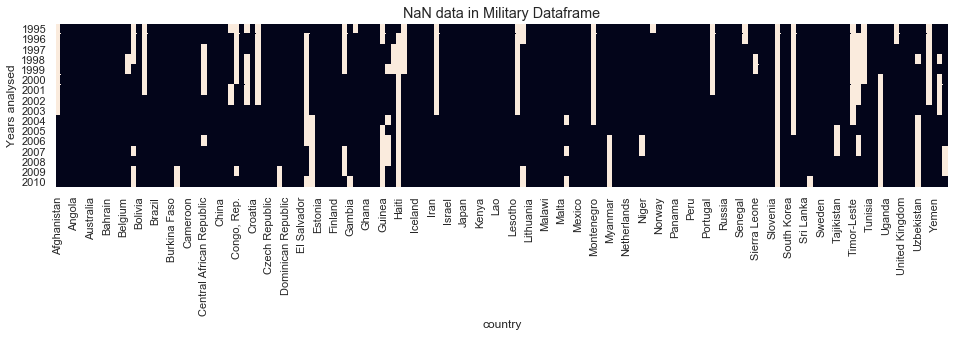

In [346]:
# Military missing data per country / year visually
plt.figure(figsize=(16,3))
sns.heatmap(military_t1.isnull(),yticklabels=True,cbar=False)

plt.title('NaN data in Military Dataframe', fontsize='x-large')
plt.ylabel('Years analysed')
plt.show()


>I see that there are some countries that have nearly no data, I need to clean then. I fix a threshold of data at values unless for 13 years out of 16 and remove the countries that has no values for more than 3 years. I generate a new dataframe without those countries 

In [347]:
# Removing countries with more than 3 years of missing data
military_t1clean=military_t1.dropna(axis=1, how='any', thresh=13, subset=None, inplace=False)

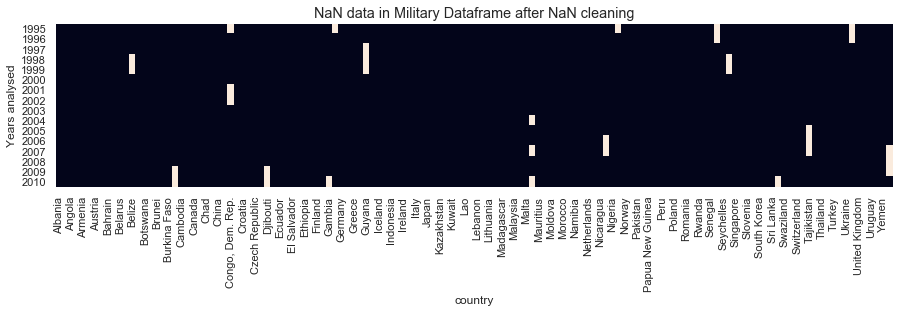

In [348]:
# Military missing data per country / year visually after removing of countries with more than 3 years missing data
plt.figure(figsize=(15,3))
sns.heatmap(military_t1clean.isnull(),yticklabels=True,cbar=False)
plt.title('NaN data in Military Dataframe after NaN cleaning', fontsize='x-large')
plt.ylabel('Years analysed')
plt.show()


In [349]:
# I check again the data quality
file_info(military_t1clean, "Military Expend")

Military Expend : countries:  16 , years:  136 , amount of data: 2176
Nan:  33 ,
1.52 %



>There are still 1.52% of missing data. Then I decide to interpolate the values for those countries to get 0 missing data

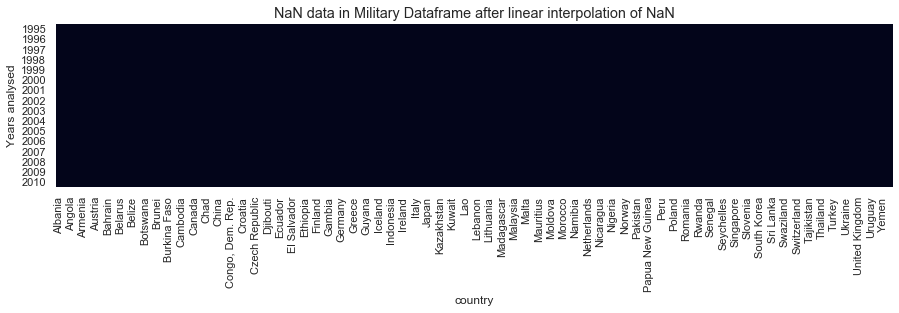

In [415]:
# data missing interpolation, linear and in both directions
military_f_t=military_t1clean.interpolate(method='linear', limit_direction='both', axis=0)
plt.figure(figsize=(15,3))
sns.heatmap(military_f_t.isnull(),yticklabels=True,cbar=False)
plt.title('NaN data in Military Dataframe after linear interpolation of NaN', fontsize='x-large')
plt.ylabel('Years analysed')
plt.show()

>I will modify the different data frame to keep the same countries than in military dataframe and at same time I will investigate if there are still missing data

In [351]:
# Transpose military file with final countries
military_f=military_f_t.T

In [352]:
#Aling countries on GdP via mergin, then split using name of columns, and finaly rename the columns
merg= military_f.merge(gdp1, on=['country'], how='inner')  #merge both files
gdp_f=merg.loc[:, "1995_y": "2010_y"]                   # new gdp file with contries aligned
gdp_f.rename(columns={'1995_y':'1995','1996_y':'1996','1997_y':'1997',
                        '1998_y':'1998','1999_y':'1999', '2000_y':'2000',
                        '2001_y':'2001','2002_y':'2002','2003_y':'2003',
                        '2004_y':'2004', '2005_y':'2005','2006_y':'2006',
                        '2007_y':'2007','2008_y':'2008','2009_y':'2009','2010_y':'2010' }, 
                 inplace=True)                            # renaming of columns on gdp

>I repeat the operation with all the files 

In [353]:
#Aling countries on Health via mergin, then split using name of columns, and finaly rename the columns
merg= military_f.merge(health1, on=['country'], how='inner')
health_f=merg.loc[:, "1995_y": "2010_y"]
health_f.rename(columns={'1995_y':'1995','1996_y':'1996','1997_y':'1997',
                        '1998_y':'1998','1999_y':'1999', '2000_y':'2000',
                        '2001_y':'2001','2002_y':'2002','2003_y':'2003',
                        '2004_y':'2004', '2005_y':'2005','2006_y':'2006',
                        '2007_y':'2007','2008_y':'2008','2009_y':'2009','2010_y':'2010' }, 
                 inplace=True)

#Aling countries on Democracy via mergin, then split using name of columns, and finaly rename the columns
merg= military_f.merge(democracy1, on=['country'], how='inner')
democracy_f=merg.loc[:, "1995_y": "2010_y"]
democracy_f.rename(columns={'1995_y':'1995','1996_y':'1996','1997_y':'1997',
                        '1998_y':'1998','1999_y':'1999', '2000_y':'2000',
                        '2001_y':'2001','2002_y':'2002','2003_y':'2003',
                        '2004_y':'2004', '2005_y':'2005','2006_y':'2006',
                        '2007_y':'2007','2008_y':'2008','2009_y':'2009','2010_y':'2010' }, 
                 inplace=True)

#Aling countries on Sugar via mergin, then split using name of columns, and finaly rename the columns
merg= military_f.merge(sugar1, on=['country'], how='inner')
sugar_f=merg.loc[:, "1995_y": "2010_y"]
sugar_f.rename(columns={'1995_y':'1995','1996_y':'1996','1997_y':'1997',
                        '1998_y':'1998','1999_y':'1999', '2000_y':'2000',
                        '2001_y':'2001','2002_y':'2002','2003_y':'2003',
                        '2004_y':'2004', '2005_y':'2005','2006_y':'2006',
                        '2007_y':'2007','2008_y':'2008','2009_y':'2009','2010_y':'2010' }, 
                 inplace=True)

#Aling countries on Suicide via mergin, then split using name of columns, and finaly rename the columns
merg= military_f.merge(suicide1, on=['country'], how='inner')
suicide_f=merg.loc[:, "1995_y": "2010_y"]
suicide_f.rename(columns={'1995_y':'1995','1996_y':'1996','1997_y':'1997',
                        '1998_y':'1998','1999_y':'1999', '2000_y':'2000',
                        '2001_y':'2001','2002_y':'2002','2003_y':'2003',
                        '2004_y':'2004', '2005_y':'2005','2006_y':'2006',
                        '2007_y':'2007','2008_y':'2008','2009_y':'2009','2010_y':'2010' }, 
                 inplace=True)


>I check the information of those files

In [354]:
print (file_info(gdp_f, "GDP"))
print (file_info(democracy_f, "Democracy"))
print (file_info(military_f, "Military"))
print (file_info(health_f, "Health"))
print (file_info(sugar_f, "Sugar"))
print (file_info(suicide_f, "Suicide"))

GDP : countries:  136 , years:  16 , amount of data: 2176
Nan:  0 ,
0.0 %

None
Democracy : countries:  130 , years:  16 , amount of data: 2080
Nan:  0 ,
0.0 %

None
Military : countries:  136 , years:  16 , amount of data: 2176
Nan:  0 ,
0.0 %

None
Health : countries:  136 , years:  16 , amount of data: 2176
Nan:  11 ,
0.51 %

None
Sugar : countries:  129 , years:  16 , amount of data: 2064
Nan:  21 ,
1.02 %

None
Suicide : countries:  136 , years:  16 , amount of data: 2176
Nan:  0 ,
0.0 %

None


>There are still some missing data on Health and Sugar. I will visually investigate where and when those data are missing

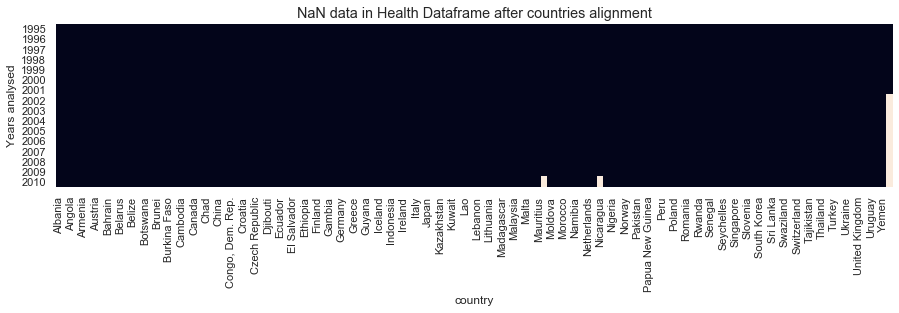

In [355]:
#Health: transpose the file and plot to see where the missing data are
health_ft=health_f.T
plt.figure(figsize=(15,3))
sns.heatmap(health_ft.isnull(),yticklabels=True,cbar=False)
plt.title('NaN data in Health Dataframe after countries alignment', fontsize='x-large')
plt.ylabel('Years analysed')
plt.show()

>The missing values are concentrated in 3 countries but mainly Yemen. I will keep Yemen in the investigation and I interpolate the data

In [356]:
#Interpolate health values
health_ft=health_ft.interpolate(method='linear', limit_direction='both', axis=0)

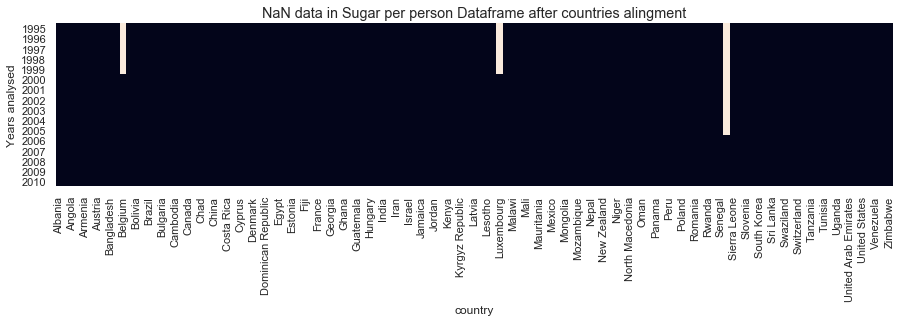

In [357]:
#Sugar: transpose the file and plot to see where the missing data are
sugar_ft=sugar_f.T
plt.figure(figsize=(15,3))
sns.heatmap(sugar_ft.isnull(),yticklabels=True,cbar=False)
plt.title('NaN data in Sugar per person Dataframe after countries alingment', fontsize='x-large')
plt.ylabel('Years analysed')
plt.show()

>The missing values are concentrated in 3 countries but mainly Sierra Leona. I will keep this country in the investigation and I interpolate the data

In [358]:
#Interpolate sugar values 
sugar_ft=sugar_ft.interpolate(method='linear', limit_direction='both', axis=0)

>I check the information of the final gpd data frame and there are not missing data
My data are now ready for next step.

In [359]:
# Information of each file
print (file_info(gdp_f, "GDP"))
print (file_info(democracy_f, "Democracy"))
print (file_info(military_f, "Military"))
print (file_info(health_f, "Health"))
print (file_info(sugar_f, "Sugar"))
print (file_info(suicide_f, "Suicide"))


GDP : countries:  136 , years:  16 , amount of data: 2176
Nan:  0 ,
0.0 %

None
Democracy : countries:  130 , years:  16 , amount of data: 2080
Nan:  0 ,
0.0 %

None
Military : countries:  136 , years:  16 , amount of data: 2176
Nan:  0 ,
0.0 %

None
Health : countries:  136 , years:  16 , amount of data: 2176
Nan:  11 ,
0.51 %

None
Sugar : countries:  129 , years:  16 , amount of data: 2064
Nan:  21 ,
1.02 %

None
Suicide : countries:  136 , years:  16 , amount of data: 2176
Nan:  0 ,
0.0 %

None


<a id='eda'></a>
## Exploratory Data Analysis

> I will realize some exporation on the data that I will use later for answering the two questions
I will transpose all the data frame, I will calculate the mean of each, I will standardize them to compare per year and by country and I will calculate the increase per year and per country for each dataframe

In [360]:
# Dataframe transpose
gdp_f_t=gdp_f.T
military_f_t=military_f.T
health_f_t=health_f.T
democracy_f_t=democracy_f.T
sugar_f_t=sugar_f.T
suicide_f_t=suicide_f.T

In [361]:
# Standardize all dataframe 
# Standardize function definition
def standardize(df):
    return (df-df.mean())/df.std(ddof=0)
        
# Standardize dataframe
gdp_f_std=standardize(gdp_f)
military_f_std=standardize(military_f)
health_f_std=standardize(health_f)
democracy_f_std=standardize(democracy_f)
sugar_f_std=standardize(sugar_f)
suicide_f_std=standardize(suicide_f)

gdp_f_t_std=standardize(gdp_f_t)
military_f_t_std=standardize(military_f_t)
health_f_t_std=standardize(health_f_t)
democracy_f_t_std=standardize(democracy_f_t)
sugar_f_t_std=standardize(sugar_f_t)
suicide_f_t_std=standardize(suicide_f_t)


In [362]:
# Increase along the year / countries: Percentage change between the current and a prior element
gdp_f_inc=gdp_f.pct_change(periods=1, fill_method='pad', limit=None, freq=None )
military_f_inc=military_f.pct_change(periods=1, fill_method='pad', limit=None, freq=None )
health_f_inc=health_f.pct_change(periods=1, fill_method='pad', limit=None, freq=None )
democracy_f_inc=democracy_f.pct_change(periods=1, fill_method='pad', limit=None, freq=None )
sugar_f_inc=sugar_f.pct_change(periods=1, fill_method='pad', limit=None, freq=None )
suicide_f_inc=suicide_f.pct_change(periods=1, fill_method='pad', limit=None, freq=None )

gdp_f_t_inc=gdp_f_t.pct_change(periods=1, fill_method='pad', limit=None, freq=None )
military_f_t_inc=military_f_t.pct_change(periods=1, fill_method='pad', limit=None, freq=None )
health_f_t_inc=health_f_t.pct_change(periods=1, fill_method='pad', limit=None, freq=None )
democracy_f_t_inc=democracy_f_t.pct_change(periods=1, fill_method='pad', limit=None, freq=None )
sugar_f_t_inc=sugar_f_t.pct_change(periods=1, fill_method='pad', limit=None, freq=None )
suicide_f_t_inc=suicide_f_t.pct_change(periods=1, fill_method='pad', limit=None, freq=None )


>First, let see the evolution of the mean along the time for the different dataset.

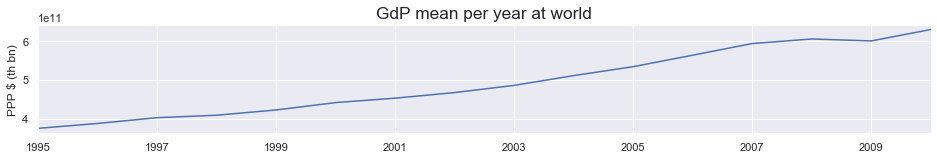

In [363]:
#GdP mean evolution
plt.figure(figsize=(16,2))
gdp_f.mean().plot(kind='line')
plt.title('GdP mean per year at world', fontsize= 'xx-large')
plt.ylabel('PPP $ (th bn)')
plt.show()

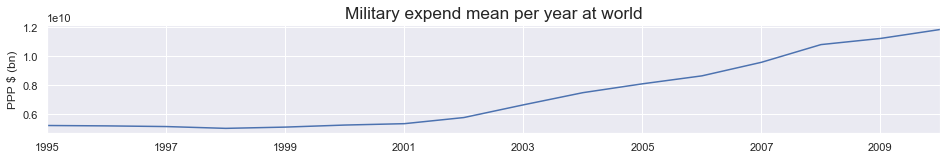

In [364]:
#Military expend mean evolution
plt.figure(figsize=(16,2))
military_f.mean().plot(kind='line')
plt.title('Military expend mean per year at world', fontsize= 'xx-large')
plt.ylabel('PPP $ (bn)')
plt.show()


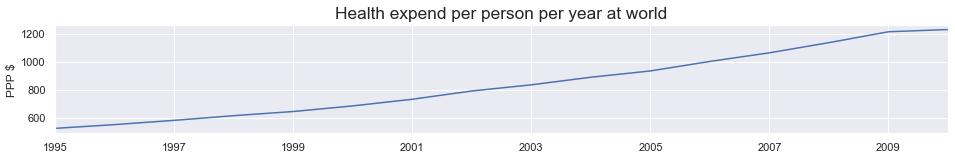

In [365]:
#Health expend  mean evolution
plt.figure(figsize=(16,2))
health_f.mean().plot(kind='line')
plt.title('Health expend per person per year at world', fontsize= 'xx-large')
plt.ylabel('PPP $')
plt.show()


>These 3 indicators show a postive evolution along the time. It looks like that GdP and health expend moves in paralel.
Military expend increase remains flat at the begining of the period but later it acelerate the increase in 2002. 
That could indicate some correlation between those figures

>Let see now the evolution of sugar per person

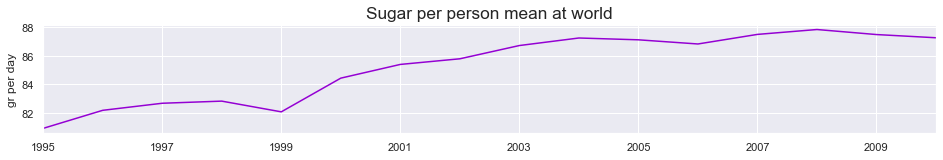

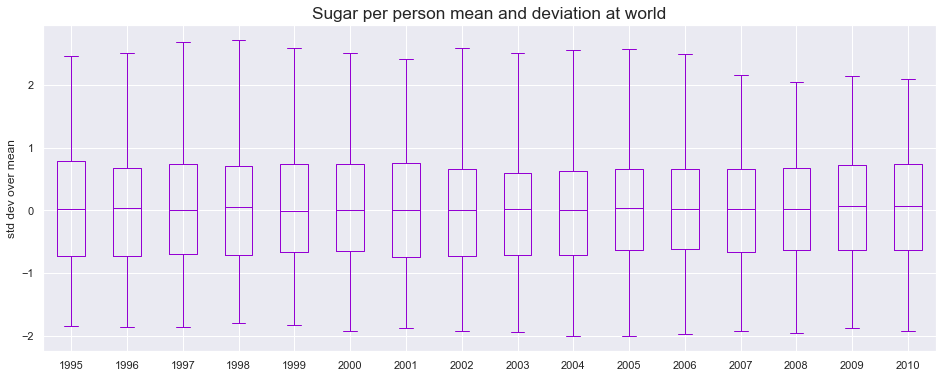

In [366]:
#Sugar per person mean evolution
plt.figure(figsize=(16,2))

plt.title('Sugar per person mean per year at world')
sugar_f.mean().plot(kind='line', color='darkviolet')
plt.title('Sugar per person mean at world', fontsize= 'xx-large')
plt.ylabel('gr per day')
plt.show()


sugar_f_std.plot(figsize=(16,6), kind='box', color='darkviolet')

plt.title('Sugar per person mean and deviation at world', fontsize= 'xx-large')
plt.ylabel('std dev over mean')
plt.show()

>The sugar comsumption increase all along the period but by baches. It incresase then reduce a bit only to increase even more.
The boxplot for sugar per person show that the increase along the time has reduce the deviation related to the highest consumer. It means more suger per person in more countries, but still some countries with  different tendency. We will come back to this point during our detailed contry analsis for answering our two questions.

> Now a short view to suicide figures

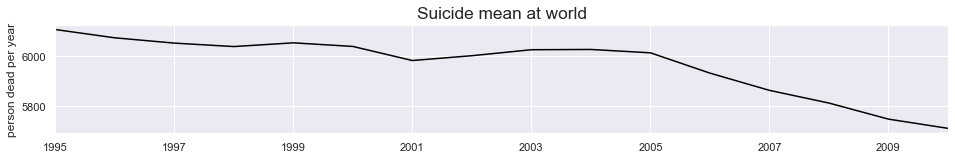

In [367]:
#Suicide mean evolution
plt.figure(figsize=(16,2))
suicide_f.mean().plot(kind='line', color='black')
plt.title('Suicide mean at world', fontsize= 'xx-large')
plt.ylabel('person dead per year')
plt.show()

>The sucide figures show a reducion of number of people dead along the period with a nearly flat line from 2001 to 2005 but and speed reducition from 2005 until the end of the period.

> Finally lets see the democracy evolution

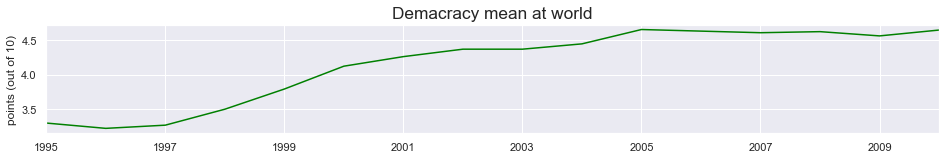

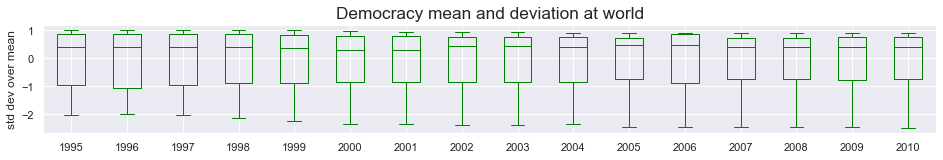

In [368]:
#Democracy mean evolution
plt.figure(figsize=(16,2))
democracy_f.mean().plot(kind='line', color='green')
plt.title('Demacracy mean at world', fontsize= 'xx-large')
plt.ylabel('points (out of 10)')
plt.show()


democracy_f_std.plot(figsize=(16,2), kind='box', color='green')

plt.title('Democracy mean and deviation at world', fontsize= 'xx-large')
plt.ylabel('std dev over mean')
plt.show()

>Democracy have increse from 1997 to 2005 but after that it remains flat.
The boxplot for democracy show us that there are mayority of the countries move to the democracy but the ones that are in the negative area are farther. It means less non democratic countries but less democracy in the non democratic countries.
We will come back to country analsis to asnwer the second question 2

> To closure this section on exploratory analyses let see the shape of the standard deviaton of all the countries along the year in each measure

In [369]:
## Funtions for standardize: 
# Standardize each column of the given DataFrame  

def standardize(df):
    return (df-df.mean())/df.std(ddof=0)
        
# Standardize each row of the given DataFrame  
def standardize_rows(df):
    mean_diffs=df.sub(df.mean(axis='columns'), axis='index') 
    return mean_diffs.div(df.std(ddof=0, axis='columns'), axis='index') 


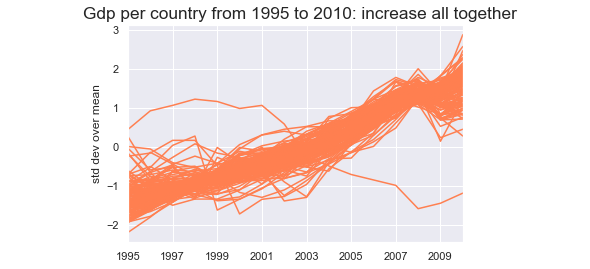

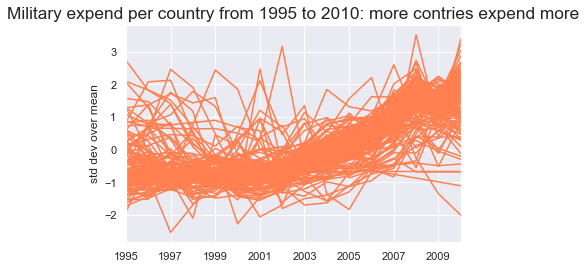

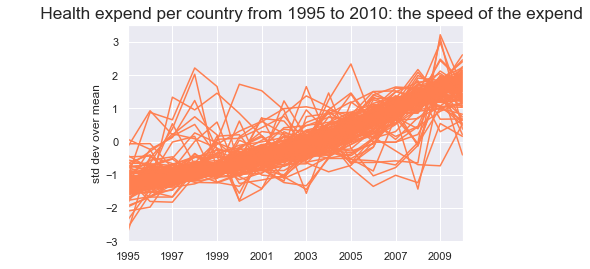

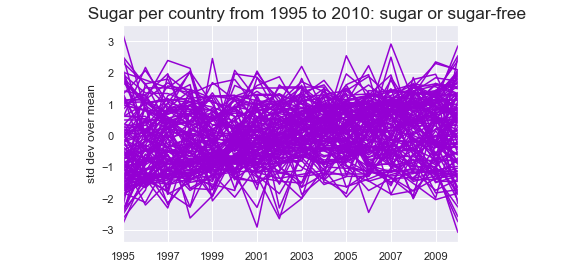

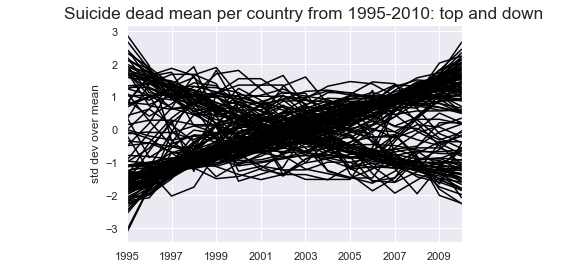

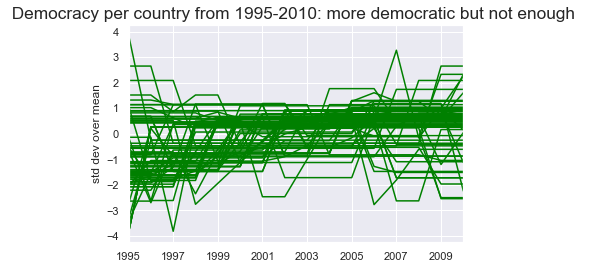

In [370]:
# Chart on standard evolution along the time, all countries

gdp_f_t_std=standardize(gdp_f_t).plot(kind='line', color='coral',legend=False)
plt.title('                Gdp per country from 1995 to 2010: increase all together              ',fontsize='xx-large')
plt.ylabel('std dev over mean')

military_f_t_std=standardize(military_f_t).plot(kind='line', color='coral',legend=False)
plt.title('Military expend per country from 1995 to 2010: more contries expend more',fontsize='xx-large')
plt.ylabel('std dev over mean')

health_f_t_std=standardize(health_f_t).plot(kind='line', color='coral',legend=False)
plt.title('       Health expend per country from 1995 to 2010: the speed of the expend',fontsize='xx-large')
plt.ylabel('std dev over mean')

sugar_f_t_std=standardize(sugar_f_t).plot(kind='line', color='darkviolet',legend=False)
plt.title('                 Sugar per country from 1995 to 2010: sugar or sugar-free          ',fontsize='xx-large')
plt.ylabel('std dev over mean')
          
standardize(suicide_f_t).plot(kind='line', color='black',legend=False)
plt.title('            Suicide dead mean per country from 1995-2010: top and down        ',fontsize='xx-large')
plt.ylabel('std dev over mean')

democracy_f_t_std=standardize(democracy_f_t).plot(kind='line', color='green',legend=False)
plt.title(' Democracy per country from 1995-2010: more democratic but not enough  ' ,fontsize='xx-large')
plt.ylabel('std dev over mean')
print (end)

> The mean of all the indicators increase but it does not mean that they are correlated, and on top, correlation does not mean casualty.
Performing some correlation analysis bring some light to the question

### Research Question 1 ( Have GbP along the period influence the expend in military and health, suicide level and sugar consuption? General world view and focus on countries with higher positive or negative correlation (over 0.8 and below -0.8))

#### Q1.1. Correlation between GdP and military expend

In [371]:
# Funtion to calculate the percentaje and amounf of countries over a threshold
def percentaje (serie, up_threshold_0_xx, down_threshold_0_xx, what ): 
    a=list()
    for i in serie:
        if i>up_threshold_0_xx:
            a.append(i)
    print ("The correlation over ", up_threshold_0_xx, "is:",(round((len(a))/len(serie)*100)),"%") 
    print('Number of ',what, ' over ', up_threshold_0_xx, "is:",len(a))
    
    b=list()
    for i in serie:
        if i<down_threshold_0_xx:
            b.append(i)
    print ("The correlation below ", down_threshold_0_xx, "is:", (round((len(b))/len(serie)*100)),"%") 
    print('Number of ',what, ' below  ', down_threshold_0_xx, "is:", len(b))


GdP vs Military expend yearly correlation details:
The correlation over  0.8 is: 100 %
Number of  years  over  0.8 is: 16
The correlation below  0.2 is: 0 %
Number of  years  below   0.2 is: 0


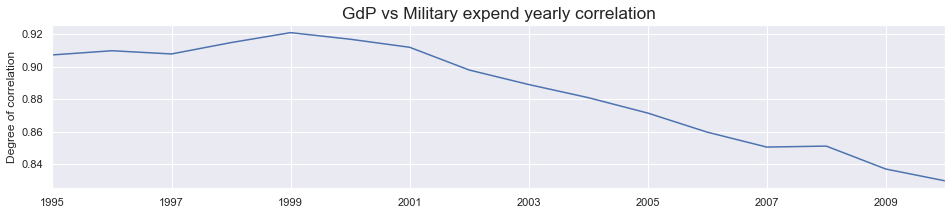

In [372]:
# # GdP vs Military expend time evolution correlation view
print( 'GdP vs Military expend yearly correlation details:')
plt.figure(figsize=(16,3))
percentaje ((gdp_f.corrwith(military_f, axis=0, method="pearson")),0.8, 0.2,  'years')
(gdp_f.corrwith(military_f, axis=0, method="pearson")).plot(kind='line')

plt.title('GdP vs Military expend yearly correlation', fontsize= 'xx-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe that the correlation is more than 0.9 until 2001 and then it decrese to be close to 0.8
GdP and military expend are high positive correlated along the time 

>Lets analyse now per country

In [373]:
# GdP vs Military expend contry correlation view:
print( 'GdP vs Military expend correlation country view:')
#plt.figure(figsize=(16,4))
percentaje ((gdp_f.corrwith(military_f, axis=1, method="pearson")), 0.8, -0.8, 'countries')
#(gdp_f.corrwith(military_f, axis=1, method="pearson")).plot(kind='bar')

GdP vs Military expend correlation country view:
The correlation over  0.8 is: 62 %
Number of  countries  over  0.8 is: 84
The correlation below  -0.8 is: 0 %
Number of  countries  below   -0.8 is: 0


>The correlation have, for more than 60% of the countries, a high postive degree (over 0.8)

In [374]:
## Function to count and show the column: 
# Print the title of the columns from a given DataFrame and 
# print the title of the columns and the title of rows from a given DataFrame
# argument is file name

def column (df):
    for i in df.columns:
        print(i,end=", ")

def index (df):
    for i in df.index:
        print(i,end=", ")   
        
def column_index (df):
    for i in df.columns:
        print(i,end=", ")
    print ("")
    for i in df.index:
        print(i,end=", ")

>Let see if there are any country with high negative correlation 

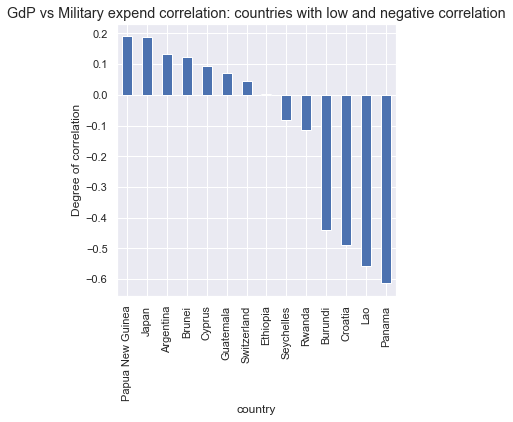

In [375]:
# Chart of countries with lower correlation and negative correlation 
plt.figure(figsize=(5,5))
(gdp_f.corrwith(military_f, axis=1, method="pearson")).sort_values(ascending=False, 
                na_position="first")[-14:].plot(kind='bar')

plt.title('GdP vs Military expend correlation: countries with low and negative correlation', fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>We can see that there are a couple of countries with a moderate negative correlation 

>We could consider that the variation on GdP tend to generate a variation on the military expenditure in direct correlation (+,+; -,-)

In [376]:
# List of countries with higher and lower correlation 
print ("The 10 countries with higher correlation are:")
index((gdp_f.corrwith(military_f, axis=1, method="pearson")).sort_values(na_position="first")[-10:])
print (end)
print ("The 10 countries with correlation index below 0.2 and negative correlation are :")
index ((gdp_f.corrwith(military_f, axis=1, method="pearson")).
                  sort_values(ascending=False, na_position="first")[-10:])


The 10 countries with higher correlation are:
Nepal, Azerbaijan, China, Czech Republic, Venezuela, Angola, Kenya, Lithuania, India, Bulgaria, 

The 10 countries with correlation index below 0.2 and negative correlation are :
Cyprus, Guatemala, Switzerland, Ethiopia, Seychelles, Rwanda, Burundi, Croatia, Lao, Panama, 

#### Q1.2. Correlation between GdP and health

GdP vs Health expend yearly correlation details:
The correlation over  0.8 is: 0 %
Number of  years  over  0.8 is: 0
The correlation below  -0.8 is: 0 %
Number of  years  below   -0.8 is: 0


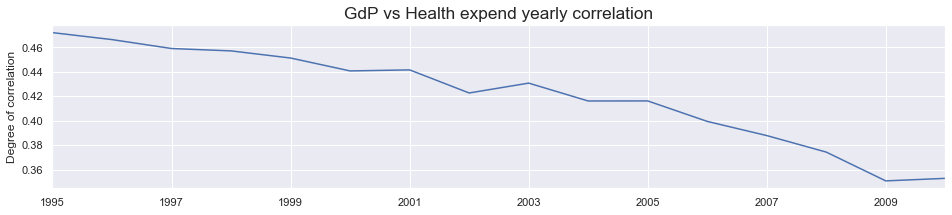

In [377]:
# # GdP vs Health expend time evolution correlation view
print( 'GdP vs Health expend yearly correlation details:')
plt.figure(figsize=(16,3))
percentaje ((gdp_f.corrwith(health_f, axis=0, method="pearson")),0.8, -0.8,  'years')
(gdp_f.corrwith(health_f, axis=0, method="pearson")).plot(kind='line')
plt.title('GdP vs Health expend yearly correlation', fontsize= 'xx-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe that the there is a moderate degree of correlation than decrease along the time

>Lets analyse now per country

In [378]:
# GdP vs Health expend contriey correlation view:
print( 'GdP vs health expend correlation country view:')
#plt.figure(figsize=(16,4))
percentaje ((gdp_f.corrwith(health_f, axis=1, method="pearson")), 0.8, -0.8, 'countries')
#(gdp_f.corrwith(health_f, axis=1, method="pearson")).plot(kind='bar')

GdP vs health expend correlation country view:
The correlation over  0.8 is: 88 %
Number of  countries  over  0.8 is: 120
The correlation below  -0.8 is: 0 %
Number of  countries  below   -0.8 is: 0


>The correlation have, for more than 80% of the countries (120 countries), a high positive degree (over 0.8)

>Let see if there are any country with high negative correlation 

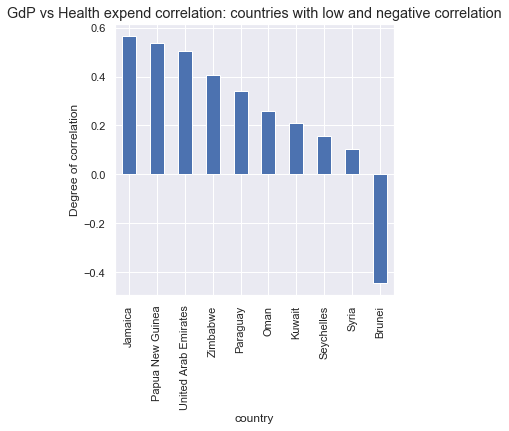

In [379]:
# Chart of countries with lower correlation and negative correlation
plt.figure(figsize=(5,5))
(gdp_f.corrwith(health_f, axis=1, method="pearson")).sort_values(ascending=False, 
                na_position="first")[-10:].plot(kind='bar')

plt.title('GdP vs Health expend correlation: countries with low and negative correlation', fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()


>We can see that there are no countries with high negative correlation

>We could consider that the variation on GdP in a country have a moderate tendency to generate a variation on the health expenditure in direct correlation (+,+; -,-)

In [380]:
# List of countries with higher and lower correlation 
print ("The 10 countries with higher correlation are:")
index((gdp_f.corrwith(health_f, axis=1, method="pearson")).sort_values(na_position="first")[-10:])
print (end)
print ("The 10 countries with lower correlation are:")
index ((gdp_f.corrwith(health_f, axis=1, method="pearson")).
                     sort_values(ascending=False, na_position="first")[-10:])

The 10 countries with higher correlation are:
Senegal, Tunisia, Burkina Faso, Cyprus, Brazil, South Africa, Belarus, Albania, Australia, India, 

The 10 countries with lower correlation are:
Jamaica, Papua New Guinea, United Arab Emirates, Zimbabwe, Paraguay, Oman, Kuwait, Seychelles, Syria, Brunei, 

#### Q1.3. Correlation between GdP and sugar per person

GdP vs sugar per person yearly correlation details:
The correlation over  0.8 is: 0 %
Number of  years  over  0.8 is: 0
The correlation below  0.2 is: 50 %
Number of  years  below   0.2 is: 8


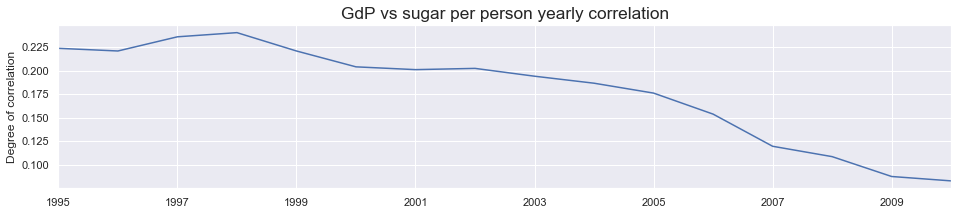

In [381]:
# # GdP vs sugar per person time evolution correlation view
print( 'GdP vs sugar per person yearly correlation details:')
plt.figure(figsize=(16,3))
percentaje ((gdp_f.corrwith(sugar_f, axis=0, method="pearson")),0.8, 0.2,  'years')
(gdp_f.corrwith(sugar_f, axis=0, method="pearson")).plot(kind='line')
plt.title('GdP vs sugar per person yearly correlation', fontsize= 'xx-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe that there is a samll degree of correlation than decrease along the time 

>Lets analyse now per country

In [382]:
# GdP vs sugar per person country correlation view:
print( 'GdP vs sugar expend correlation country view:')
percentaje ((gdp_f.corrwith(sugar_f, axis=1, method="pearson")), 0.8, -0.8, 'countries')

GdP vs sugar expend correlation country view:
The correlation over  0.8 is: 21 %
Number of  countries  over  0.8 is: 29
The correlation below  -0.8 is: 7 %
Number of  countries  below   -0.8 is: 10


>We observe that in 21% of the countries (29 countries) the correlation is positive and over 0.8
Regarding negative correlation, we see that 7% of the countries (7 countries) with high negative correlation (-0.8)

>Let see the countries with higher direct correlation

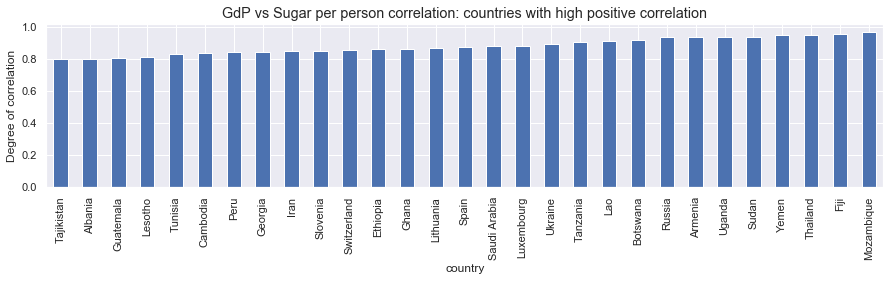

In [383]:
# Chart of countries with high positive correlation 
plt.figure(figsize=(15,3))
(gdp_f.corrwith(sugar_f, axis=1, method="pearson")). sort_values(na_position="first")[-29:].plot(kind='bar')
plt.title('GdP vs Sugar per person correlation: countries with high positive correlation', fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>Let see now the countries with high negative correlation 

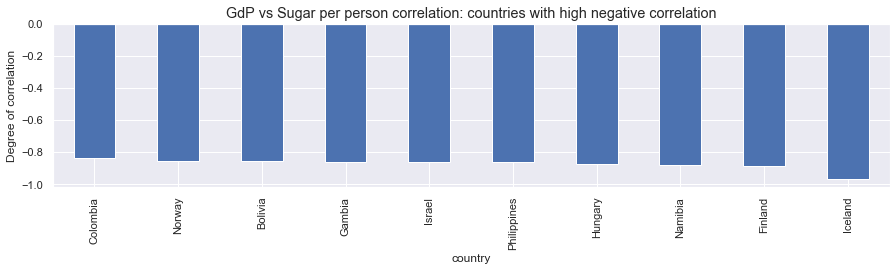

In [384]:
# Chart of countries with high negative correlation 
plt.figure(figsize=(15,3))
(gdp_f.corrwith(sugar_f, axis=1, method="pearson")).sort_values(ascending=False, 
                na_position="first")[-10:].plot(kind='bar')
plt.title('GdP vs Sugar per person correlation: countries with high negative correlation', fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>It seams that the variation on GdP in a country have a moderate tendency to generate a variation on the sugar per person but not always in the same direction. There is a strong positive correlation for some countries and for others a storng negative correlation. 

> As seen before in the boxplot, sugar consuption increase along the time and for mayority of the countries. 
But there are countries with deviation over 2 (+ and -).

In [385]:
# List of countries with higher and lower correlation 
print ("The 30 countries with higher correlation between gdp and sugar are:")
gdp_sugar_hc=index((gdp_f.corrwith(sugar_f, axis=1, method="pearson")).
                   sort_values(na_position="first")[-29:])
print(gdp_sugar_hc)
print ("The 15 countries with lower correlation between gdp and sugar are:")
gdp_sugar_lc=index ((gdp_f.corrwith(sugar_f, axis=1, method="pearson")).
                    sort_values(ascending=False, na_position="first")[-10:])
print(gdp_sugar_lc)

The 30 countries with higher correlation between gdp and sugar are:
Tajikistan, Albania, Guatemala, Lesotho, Tunisia, Cambodia, Peru, Georgia, Iran, Slovenia, Switzerland, Ethiopia, Ghana, Lithuania, Spain, Saudi Arabia, Luxembourg, Ukraine, Tanzania, Lao, Botswana, Russia, Armenia, Uganda, Sudan, Yemen, Thailand, Fiji, Mozambique, None
The 15 countries with lower correlation between gdp and sugar are:
Colombia, Norway, Bolivia, Gambia, Israel, Philippines, Hungary, Namibia, Finland, Iceland, None


#### Q1.4. Correlation between GdP and suicide

GdP vs suicide expend yearly correlation details:
The correlation over  0.8 is: 0 %
Number of  years  over  0.8 is: 0
The correlation below  -0.8 is: 0 %
Number of  years  below   -0.8 is: 0


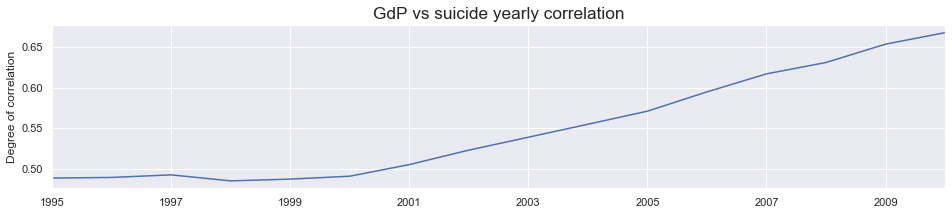

In [386]:
# # GdP vs suicide dead time evolution correlation view
print( 'GdP vs suicide expend yearly correlation details:')
plt.figure(figsize=(16,3))
percentaje ((gdp_f.corrwith(suicide_f, axis=0, method="pearson")),0.8, -0.8,  'years')
(gdp_f.corrwith(suicide_f, axis=0, method="pearson")).plot(kind='line')
plt.title('GdP vs suicide yearly correlation', fontsize= 'xx-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe that there is a moderate degree of correlation than being flat unitil 2001 and suddenly increase  

>Lets analyse now per country

In [387]:
# GdP vs suicide contry correlation view
print( 'GdP vs suicide expend correlation country view:')
#plt.figure(figsize=(16,2))
percentaje ((gdp_f.corrwith(suicide_f, axis=1, method="pearson")), 0.8, -0.8, 'countries')
#(gdp_f.corrwith(suicide_f, axis=1, method="pearson")).plot(kind='bar')

GdP vs suicide expend correlation country view:
The correlation over  0.8 is: 49 %
Number of  countries  over  0.8 is: 66
The correlation below  -0.8 is: 22 %
Number of  countries  below   -0.8 is: 30


>We observe that in 49% of the countries (66 countries) the correlation is positive and over 0.8
Regarding negative correlation, we see 30 countries (22%) with high negative correlation (-0.8)

>Let see the countries with higher direct correlation

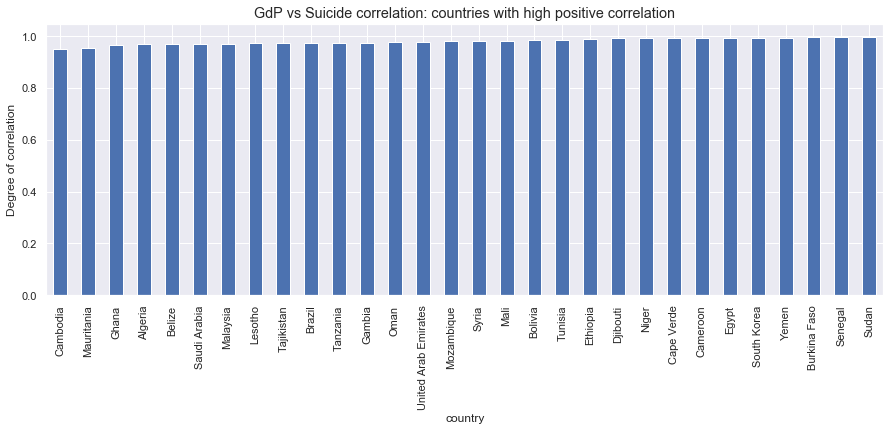

In [388]:
# Chart of countries with high postive correlation 
plt.figure(figsize=(15,5))
(gdp_f.corrwith(suicide_f, axis=1, method="pearson")). sort_values(na_position="first")[-30:].plot(kind='bar')
plt.title('GdP vs Suicide correlation: countries with high positive correlation', fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>We can see that there are some countries with a perfect postive correlation

>Let see now the countries with high negative correlation 

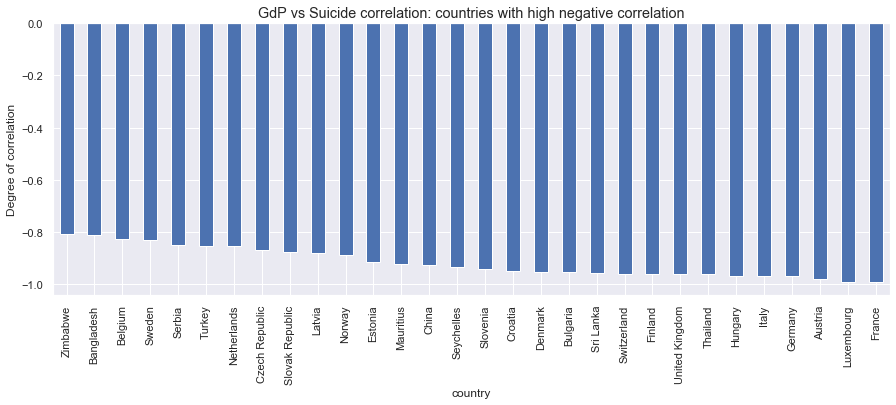

In [389]:
# Chart of countries with high negative correlation 
plt.figure(figsize=(15,5))
(gdp_f.corrwith(suicide_f, axis=1, method="pearson")).sort_values(ascending=False, 
                na_position="first")[-30:].plot(kind='bar')
plt.title('GdP vs Suicide correlation: countries with high negative correlation', fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe some countries with nearly perfect negative correlation. 

>We could not say that Gdp cause changes in suicide level but we see that is a certain correlation, in some countries there is a strong positive correlation and in others storng negative. 

In [390]:
print ("The 30 countries with higher positive correlation between gdp and suicide are:")
gdp_suicide_hc=index((gdp_f.corrwith(suicide_f, axis=1, method="pearson")).
                   sort_values(na_position="first")[-30:])
print(gdp_suicide_hc)

print ("The 30 countries with higher negative correlation between gdp and suicide are:")
gdp_suicide_lc=index ((gdp_f.corrwith(suicide_f, axis=1, method="pearson")).
                    sort_values(ascending=False, na_position="first")[-30:])

The 30 countries with higher positive correlation between gdp and suicide are:
Cambodia, Mauritania, Ghana, Algeria, Belize, Saudi Arabia, Malaysia, Lesotho, Tajikistan, Brazil, Tanzania, Gambia, Oman, United Arab Emirates, Mozambique, Syria, Mali, Bolivia, Tunisia, Ethiopia, Djibouti, Niger, Cape Verde, Cameroon, Egypt, South Korea, Yemen, Burkina Faso, Senegal, Sudan, None
The 30 countries with higher negative correlation between gdp and suicide are:
Zimbabwe, Bangladesh, Belgium, Sweden, Serbia, Turkey, Netherlands, Czech Republic, Slovak Republic, Latvia, Norway, Estonia, Mauritius, China, Seychelles, Slovenia, Croatia, Denmark, Bulgaria, Sri Lanka, Switzerland, Finland, United Kingdom, Thailand, Hungary, Italy, Germany, Austria, Luxembourg, France, 

### Research Question 2  (Have the democracy along the period influence the expend in military and health, suicide level and sugar consuption? General world view and focus on countries with higher positive or negative correlation (over 0.8 and below -0.8))

#### Q2.1. Correlation between democracy and military expend

Democracy vs Military expend yearly correlation details:
The correlation over  0.8 is: 0 %
Number of  years  over  0.8 is: 0
The correlation below  -0.8 is: 0 %
Number of  years  below   -0.8 is: 0


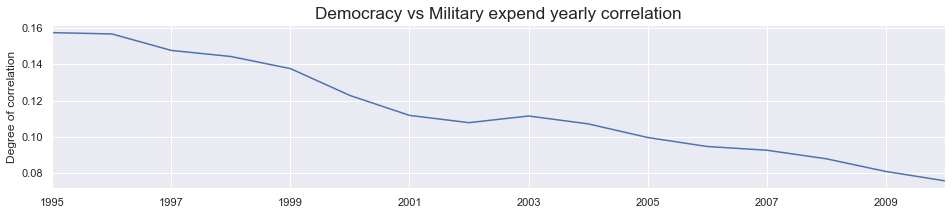

In [391]:
# # democracy vs Military expend time evolution correlation view
print( 'Democracy vs Military expend yearly correlation details:')
plt.figure(figsize=(16,3))
percentaje ((democracy_f.corrwith(military_f, axis=0, method="pearson")),0.8, -0.8,  'years')
(democracy_f.corrwith(military_f, axis=0, method="pearson")).plot(kind='line')
plt.title('Democracy vs Military expend yearly correlation', fontsize= 'xx-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe that there is a very low level of correlation than becomes nearly no correlation.  

>Lets analyse now per country

In [392]:
# democracy vs Military expend contry correlation view:
print( 'democracy vs Military expend correlation country view:')
#plt.figure(figsize=(16,4))
percentaje ((democracy_f.corrwith(military_f, axis=1, method="pearson")), 0.8, -0.8, 'countries')
#(democracy_f.corrwith(military_f, axis=1, method="pearson")).plot(kind='bar')

democracy vs Military expend correlation country view:
The correlation over  0.8 is: 5 %
Number of  countries  over  0.8 is: 7
The correlation below  -0.8 is: 4 %
Number of  countries  below   -0.8 is: 5


>We do not observe correlation between democracy and military expend. Only 7 countries (5%) have a high positive correlation (0.8) and 4% (5 countires) has a high negative correlation (-0.8)

>Let check at 0.4 / -0.4 for a moderate correlation degree

In [393]:
# democracy vs Military expend contry correlation view:
print( 'democracy vs Military expend correlation country view:')
#plt.figure(figsize=(16,4))
percentaje ((democracy_f.corrwith(military_f, axis=1, method="pearson")), 0.4, -0.4, 'countries')
#(democracy_f.corrwith(military_f, axis=1, method="pearson")).plot(kind='bar')

democracy vs Military expend correlation country view:
The correlation over  0.4 is: 25 %
Number of  countries  over  0.4 is: 34
The correlation below  -0.4 is: 10 %
Number of  countries  below   -0.4 is: 14


>We can see now a certain moderate degree of correlaton as 34 countries (25%) have a positive correlation and 14 countries (10%) have a negative correlation

>Let see the countries with high negative correlation

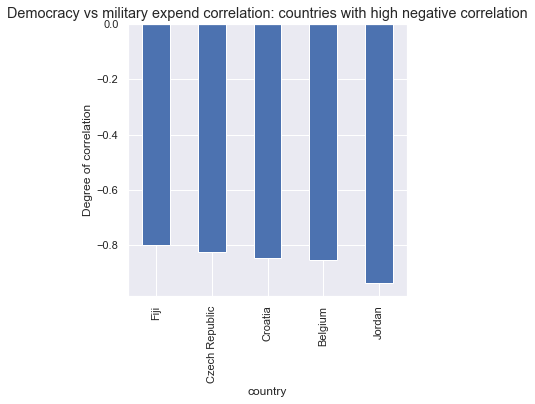

In [394]:
# Chart of countries with lower correlation and negative correlation 
plt.figure(figsize=(5,5))
(democracy_f.corrwith(military_f, axis=1, method="pearson")).sort_values(ascending=False, 
                na_position="first")[-5:].plot(kind='bar')
plt.title('Democracy vs military expend correlation: countries with high negative correlation',
          fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe some countries with high negative correlation. 

>We could not say that Democracy determine the military expend, but it will be interestign to investigate this correlation year by year for the countries where democracy score has important variations (+/-) along the time. 

In [395]:
# List of countries with higher and lower correlation 
print ("The 10 countries with higher correlation are:")
index((democracy_f.corrwith(military_f, axis=1, method="pearson")).sort_values(na_position="first")[-10:])
print (end)
print ("The 10 countries with negative correlation are:")
index ((democracy_f.corrwith(military_f, axis=1, method="pearson")).
                  sort_values(ascending=False, na_position="first")[-10:])


The 10 countries with higher correlation are:
Albania, Egypt, Bulgaria, Oman, Nicaragua, Algeria, Kyrgyz Republic, Chile, Bahrain, Sudan, 

The 10 countries with negative correlation are:
Rwanda, Ecuador, Kazakhstan, Bolivia, Tunisia, Fiji, Czech Republic, Croatia, Belgium, Jordan, 

#### Q2.2. Correlation between democracy and health

democracy vs Health expend yearly correlation details:
The correlation over  0.8 is: 0 %
Number of  years  over  0.8 is: 0
The correlation below  -0.8 is: 0 %
Number of  years  below   -0.8 is: 0


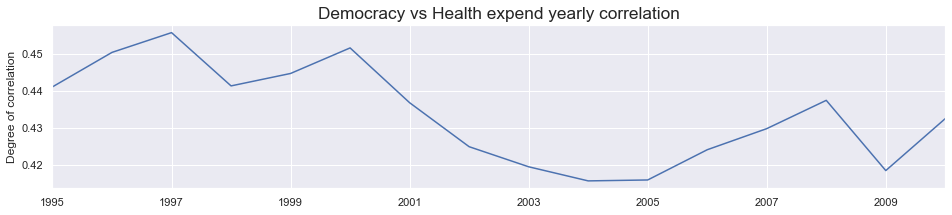

In [396]:
# # Democracy vs Health expend time evolution correlation view
print( 'democracy vs Health expend yearly correlation details:')
plt.figure(figsize=(16,3))
percentaje ((democracy_f.corrwith(health_f, axis=0, method="pearson")),0.8, -0.8,  'years')
(democracy_f.corrwith(health_f, axis=0, method="pearson")).plot(kind='line')
plt.title('Democracy vs Health expend yearly correlation', fontsize= 'xx-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe that there is a moderate degree of correlation with small variatins along the time.  

>Lets analyse now per country

In [397]:
# democracy vs Military expend contry correlation view:
print( 'democracy vs health expend correlation country view:')
#plt.figure(figsize=(16,4))
percentaje ((democracy_f.corrwith(health_f, axis=1, method="pearson")), 0.8, -0.8, 'countries')
#(democracy_f.corrwith(health_f, axis=1, method="pearson")).plot(kind='bar')

democracy vs health expend correlation country view:
The correlation over  0.8 is: 9 %
Number of  countries  over  0.8 is: 12
The correlation below  -0.8 is: 3 %
Number of  countries  below   -0.8 is: 4


>We observe that in 9% of the countries (12 countries) the correlation is positive and over 0.8
Regarding negative correlation, we see only a 4 countries (3%) with high negative correlation (-0.8)
We investigate over the countries with higher and lower correlation.


>Let see the countries with high positive correlation

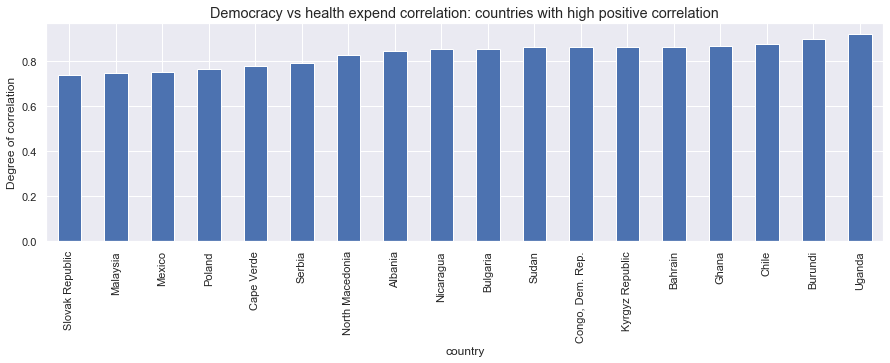

In [398]:
# Chart of countries with high positive correlation 
plt.figure(figsize=(15,4))
(democracy_f.corrwith(health_f, axis=1, method="pearson")). sort_values(na_position="first")[-18:].plot(kind='bar')
plt.title('Democracy vs health expend correlation: countries with high positive correlation',
          fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>We can see that there are some countries with a high postive correlation degree. 
Remember that this positive correlation can be not only in the sense more democracy, more health expend but int he sense of less democracy and less health expend

>Let see now the countries with high negative correlation 

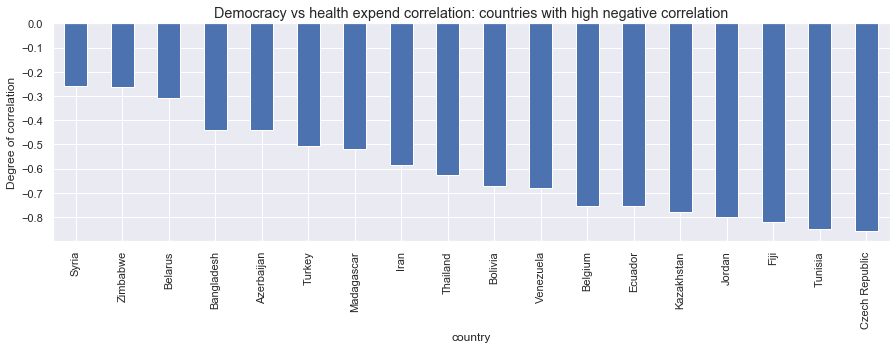

In [399]:
# Chart of countries with high negative correlation
plt.figure(figsize=(15,4))
(democracy_f.corrwith(health_f, axis=1, method="pearson")).sort_values(ascending=False, 
                na_position="first")[-18:].plot(kind='bar')
plt.title('Democracy vs health expend correlation: countries with high negative correlation',
          fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe some countries with high negative correlation. 

>We could not say that Democracy determine the health expend, but it will be interestign to investigate this correlation year by year for the countries where democracy score has important variations (+/-) along the time.

In [400]:
# List of countries with higher and lower correlation 
print ("The 10 countries with higher correlation are:")
index((democracy_f.corrwith(health_f, axis=1, method="pearson")).sort_values(na_position="first")[-12:])
print (end)

print ("The 10 countries with higher negative correlation are:")
index ((democracy_f.corrwith(health_f, axis=1, method="pearson")).
                     sort_values(ascending=False, na_position="first")[-4:])

The 10 countries with higher correlation are:
North Macedonia, Albania, Nicaragua, Bulgaria, Sudan, Congo, Dem. Rep., Kyrgyz Republic, Bahrain, Ghana, Chile, Burundi, Uganda, 

The 10 countries with higher negative correlation are:
Jordan, Fiji, Tunisia, Czech Republic, 

#### Q2.3. Correlation between democracy and sugar per person

democracy vs sugar per person yearly correlation details:
The correlation over  0.8 is: 0 %
Number of  years  over  0.8 is: 0
The correlation below  0.2 is: 0 %
Number of  years  below   0.2 is: 0


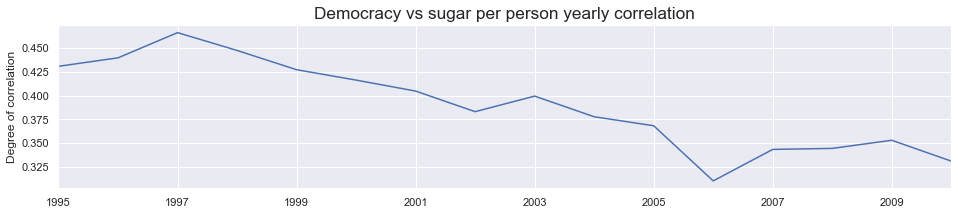

In [401]:
# # democracy vs sugar per person time evolution correlation view
print( 'democracy vs sugar per person yearly correlation details:')
plt.figure(figsize=(16,3))
percentaje ((democracy_f.corrwith(sugar_f, axis=0, method="pearson")),0.8, 0.2,  'years')
(democracy_f.corrwith(sugar_f, axis=0, method="pearson")).plot(kind='line')
plt.title('Democracy vs sugar per person yearly correlation', fontsize= 'xx-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe that there is a moderate degree of correlation that decrease along the time.  

>Lets analyse now per country

In [402]:
# democracy vs sugar per person country correlation view:
print( 'Democracy vs sugar per person correlation country view:')

percentaje ((democracy_f.corrwith(sugar_f, axis=1, method="pearson")), 0.8, -0.8, 'countries')
#plt.figure(figsize=(16,4))
#(democracy_f.corrwith(sugar_f, axis=1, method="pearson")).plot(kind='bar')

Democracy vs sugar per person correlation country view:
The correlation over  0.8 is: 3 %
Number of  countries  over  0.8 is: 4
The correlation below  -0.8 is: 1 %
Number of  countries  below   -0.8 is: 2


>We do not observe correlation between democracy and sugar per person. 
Only 4 countries has a positive correlation over 0.8 and only 2 have a negative correlation (-0.8)

>Let check at 0.4 / -0.4 for a moderate correlation degree

In [403]:
# democracy vs sugar per person country correlation view:
print( 'Democracy vs sugar per person correlation country view:')
percentaje ((democracy_f.corrwith(sugar_f, axis=1, method="pearson")), 0.4, -0.4, 'countries')
#(democracy_f.corrwith(military_f, axis=1, method="pearson")).plot(kind='bar')

Democracy vs sugar per person correlation country view:
The correlation over  0.4 is: 24 %
Number of  countries  over  0.4 is: 32
The correlation below  -0.4 is: 7 %
Number of  countries  below   -0.4 is: 9


>We can see now a certain moderate degree of correlaton as 32 countries (24%) have a positive correlation and 9 countries (7%) have a negative correlation

>Let see the countries with high negative correlation

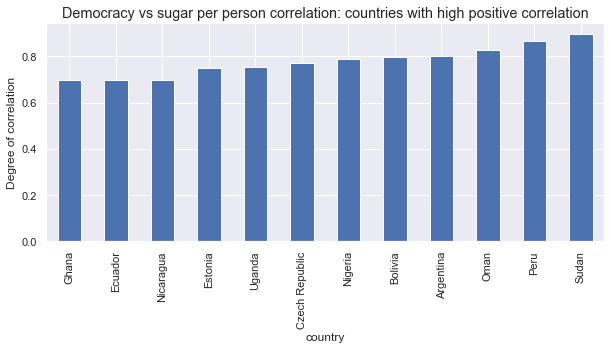

In [404]:
# Chart of countries with high positive correlation 
plt.figure(figsize=(10,4))
(democracy_f.corrwith(sugar_f, axis=1, method="pearson").sort_values(na_position="first")[-12:].plot(kind='bar'))

plt.title('Democracy vs sugar per person correlation: countries with high positive correlation',
          fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>We can see that the postive correlation degree is not so high. 

>Let see now the countries with high negative correlation 

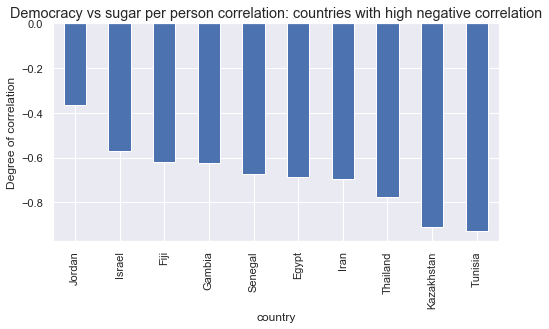

In [405]:
# Chart of countries with high negative correlation 
plt.figure(figsize=(8,4))
(democracy_f.corrwith(sugar_f, axis=1, method="pearson")).sort_values(ascending=False, 
                na_position="first")[-10:].plot(kind='bar')
plt.title('Democracy vs sugar per person correlation: countries with high negative correlation',
          fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe a few countries with high negative correlation. 

>It seams democracy has, in general, between moderate and low degree of correlation with sugar per person. 

In [406]:
# List of countries with higher and lower correlation 
print ("The 30 countries with higher correlation between democracy and sugar are:")
democracy_sugar_hc=index((democracy_f.corrwith(sugar_f, axis=1, method="pearson")).
                   sort_values(na_position="first")[-7:])
print(democracy_sugar_hc)
print ("The 30 countries with lower correlation between democracy and sugar are:")
democracy_sugar_lc=index ((democracy_f.corrwith(sugar_f, axis=1, method="pearson")).
                    sort_values(ascending=False, na_position="first")[-5:])
print(democracy_sugar_lc)

The 30 countries with higher correlation between democracy and sugar are:
Czech Republic, Nigeria, Bolivia, Argentina, Oman, Peru, Sudan, None
The 30 countries with lower correlation between democracy and sugar are:
Egypt, Iran, Thailand, Kazakhstan, Tunisia, None


#### Q2.4. Correlation between democracy and suicide

democracy vs suicide yearly correlation details:
The correlation over  0.8 is: 0 %
Number of  years  over  0.8 is: 0
The correlation below  -0.8 is: 0 %
Number of  years  below   -0.8 is: 0


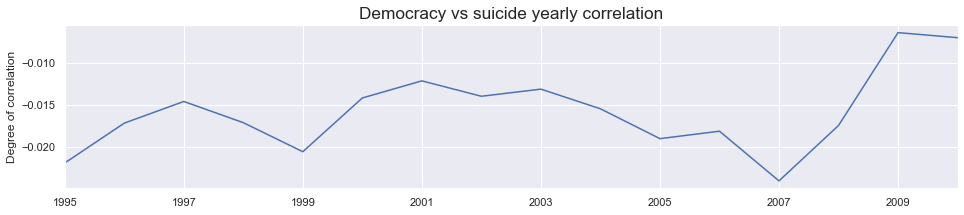

In [420]:
# # Democracy vs Suicide time evolution correlation view
print( 'democracy vs suicide yearly correlation details:')
plt.figure(figsize=(16,3))
percentaje ((democracy_f.corrwith(suicide_f, axis=0, method="pearson")),0.8, -0.8,  'years')
(democracy_f.corrwith(suicide_f, axis=0, method="pearson")).plot(kind='line')
plt.title('Democracy vs suicide yearly correlation', fontsize= 'xx-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe that there is a very low negative degree of correlation that decrease along the time.  

>Lets analyse now per country

In [408]:
# democracy vs suicide country correlation view
print( 'Democracy vs suicide correlation country view:')
#plt.figure(figsize=(16,3))
percentaje ((democracy_f.corrwith(suicide_f, axis=1, method="pearson")), 0.8, -0.8, 'countries')
#(democracy_f.corrwith(suicide_f, axis=1, method="pearson")).plot(kind='bar')

Democracy vs suicide correlation country view:
The correlation over  0.8 is: 11 %
Number of  countries  over  0.8 is: 15
The correlation below  -0.8 is: 5 %
Number of  countries  below   -0.8 is: 7


>We do not observe high correlation between democracy and suicide. 
There are only 11% of the countries (15 countries) with a positive correlation over 0.8 and only 5% with a negative correlaton over -0.8

>Let check at 0.4 / -0.4 for a moderate correlation degree

In [409]:
# democracy vs suicide country correlation view:
print( 'Democracy vs suicide correlation country view:')
percentaje ((democracy_f.corrwith(suicide_f, axis=1, method="pearson")), 0.4, -0.4, 'countries')
#(democracy_f.corrwith(military_f, axis=1, method="pearson")).plot(kind='bar')

Democracy vs suicide correlation country view:
The correlation over  0.4 is: 34 %
Number of  countries  over  0.4 is: 46
The correlation below  -0.4 is: 11 %
Number of  countries  below   -0.4 is: 15


>We can see now a certain moderate degree of correlaton as 46 countries (34%) have a positive correlation over 0.4 and 15 countries (11%) have a negative correlation

>Let see the countries with high positive correlation. 

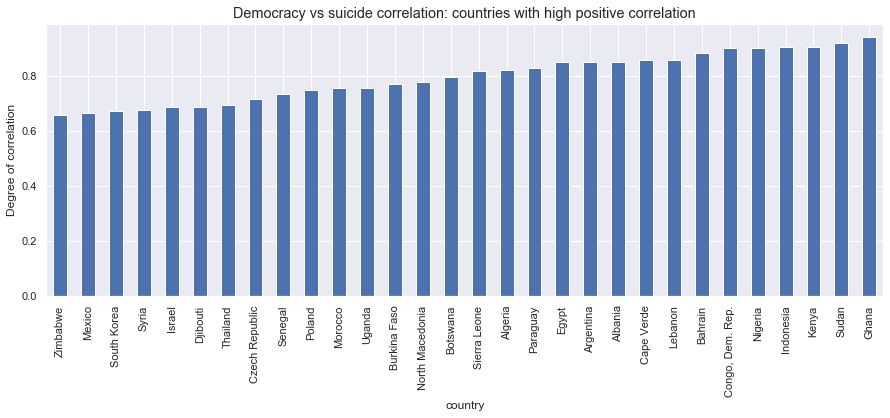

In [419]:
# Chart of countries with high postive correlation 
plt.figure(figsize=(15,5))
(democracy_f.corrwith(suicide_f, axis=1, method="pearson").sort_values
                     (na_position="first") [-30:].plot(kind='bar'))

plt.title('Democracy vs suicide correlation: countries with high positive correlation',
          fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>We can see that there are a few countries with a hight positive correlation degree. 
But in general we can say that there is not positive correlation between democracy and suicide

>Let see now the countries with high negative correlation 

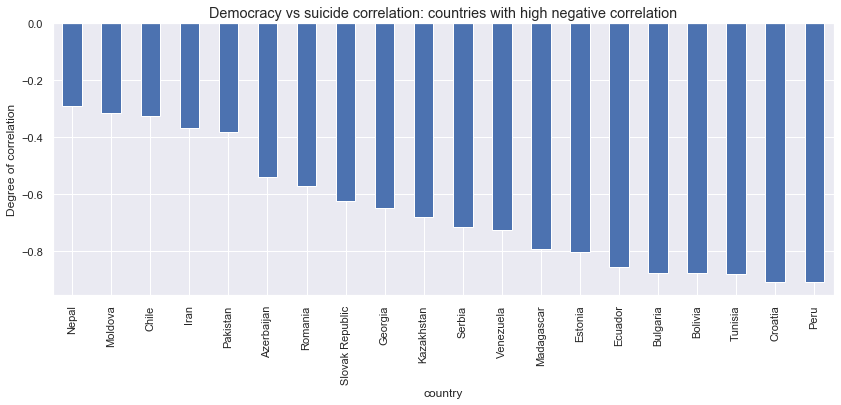

In [411]:
# Chart of countries with high negative correlation 
plt.figure(figsize=(14,5))
(democracy_f.corrwith(suicide_f, axis=1, method="pearson")).sort_values(ascending=False, 
                na_position="first")[-20:].plot(kind='bar')
plt.title('Democracy vs suicide correlation: countries with high negative correlation',
          fontsize= 'x-large')
plt.ylabel('Degree of correlation')
plt.show()

>We observe a few countries with high negative correlation. 

>It seams democracy has, in general, a low negative correlation with suicide. 

>We could not say that democracy and suicide has a direct correlation. 

In [412]:
print ("The 10 countries with higher positive correlation between democracy and suicide are:")
democracy_suicide_hc=index((democracy_f.corrwith(suicide_f, axis=1, method="pearson")).
                   sort_values(na_position="first")[-10:])
print(democracy_suicide_hc)

print ("The 10 countries with higher negative correlation between democracy and suicide are:")
democracy_suicide_lc=index ((democracy_f.corrwith(suicide_f, axis=1, method="pearson")).
                    sort_values(ascending=False, na_position="first")[-10:])

The 10 countries with higher positive correlation between democracy and suicide are:
Albania, Cape Verde, Lebanon, Bahrain, Congo, Dem. Rep., Nigeria, Indonesia, Kenya, Sudan, Ghana, None
The 10 countries with higher negative correlation between democracy and suicide are:
Serbia, Venezuela, Madagascar, Estonia, Ecuador, Bulgaria, Bolivia, Tunisia, Croatia, Peru, 

<a id='conclusions'></a>
## Conclusions

> Q1. Have GbP along the period influence the expend in military and health, suicide level and sugar consuption? General world view and focus on countries with higher positive or negative correlation (over 0.8 and below -0.8)
 We observe that 88% of the countries has a positive correlation over 0.8 with health expend and that 62% of the countries has a postive correlation over 0.8 with military expend. 
 We could say that there is some correlation between suicide and GdP as 49% of the countries has a positive correlation over 0.8.
 On the other hand, 22% of the countries show a negative correlation (over -0.8) between suicide and GdP.
 GdP and sugar show low correlation positive (21% over 0.8) or negative (7% over -0.8)

> Q2. Have the democracy along the period influence the expend in military and health, suicide level and sugar consuption? General world view and focus on countries with higher positive or negative correlation (over 0.8 and below -0.8)
 Democracy shows very low correlation level with military or health expend, sugar per person or suicide. The biggest value is 11% of positive correlation over 0.8 with sugar.
 
 
> Wrap-up: The anlyses of the GdP and Democracy correlations shows that is more pausible that GdP have influence on Military and health expend than democracy. On top, GdP evolution along the period is wider than Democracy evolution.
It would be interesting to repeat this analysis in the future to check if those correlations evolve during SXXI



## Main challenges

>The main challenge of this investigation has been the data quality in the sense of there are many missing values. I have analysed the data frames and found that for Military Expend the level of NaN was over 10% and some countries do not have any data. I decide then to remove those countries out of the analysis.
Once all those countries remove from the different data set, still was around 1% of data missing, I decide then to interpolate as consider that was the most practical approach.

>I have discover that sugar per person increase all that period, I was convinced we consume less sugar at the beginign of 21st century than in the 90ths.

>Regarding GdB it was great to see that we increase all around the world and not only some countries

>Being my first contact with Python and data analysis, I have learn a lot about dataframe managing and analysis as well as visual management of information.

>I have spend a lot of time reading other people contributions and questions on stack overflow. I found great this open comunity dealing with data. 


## Source of codes and ideas

> I have got inspiration and answer to some coding questions in these pages

https://github.com/alankashiwa/investigate-gapminder-dataset/blob/master/investigate-gapminder-dataset.ipynb

http://htmlpreview.github.io/?https://github.com/latinacode/Investigate-a-Dataset/blob/master/investigate-a-dataset-Socio-demographic-variables-resubmit.html

https://medium.com/@namnguyen168/gapminder-data-how-has-the-world-changed-for-200-years-2577633284fc

https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blame/master/all/all.csv

https://christinalk.github.io/python-novice-gapminder-custom/aio/

https://matplotlib.org/gallery/lines_bars_and_markers/masked_demo.html#sphx-glr-gallery-lines-bars-and-markers-masked-demo-py

https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/ 

https://www.pythond.com/20594/seleccionando-multiples-columnas-en-un-dataframe-de-pandas.html 

https://jefflirion.github.io/udacity/Intro_to_Data_Analysis/Lesson2/Lesson2.html 

https://realpython.com/pandas-read-write-files/ 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.difference.html 

https://stackoverflow.com/questions/43311555/how-to-drop-column-according-to-nan-percentage-for-dataframe 

https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe 

https://stackoverflow.com/questions/14247586/how-to-select-rows-with-one-or-more-nulls-from-a-pandas-dataframe-without-listin https://realpython.com/pandas-read-write-files/ 

https://www.analyseup.com/python-data-science-reference/pandas-exploring-data.html 

https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_GdP_Democracy_v2.ipynb'])

0